# Notebook Per il Testing Dei modelli

In questo notebook è possibile testare i modelli visti negli altri 2 notebook su un validation set.
Si compone di 2 parti: una relativa alle Immagini e una relativa agli Audio.


### IMPORT

In [1]:
import numpy as np 
import pandas as pd
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
import librosa
import IPython.display as ipd
import librosa.display

import soundfile as sf
import sklearn
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import classification_report, roc_curve, auc, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, IsolationForest
from sklearn.covariance import EllipticEnvelope

import scikitplot as skplt
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.optimizers as Optimizer

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D

import warnings
warnings.filterwarnings('ignore')

dataset_Imm_dir = os.path.join("Datasets/Validation_Set_Immagini")
modelli_Imm_dir = os.path.join("Modelli/Immagini")
dataset_Audio_dir = os.path.join("Datasets/Validation_Set_Audio")
modelli_Audio_dir = os.path.join("Modelli/Audio")
spettri_dir = os.path.join("Datasets/SpettriAudio")

## Immagini

Nella cella seguente carichiamo il dataset: 

In [2]:
def get_images(directory):
    Images=[]
    Labels=[]
    #definiamo un dizionario che andrà a contenere i tipi di etichette che abbiamo
    label_dict={}
    i=0
    for filename in os.listdir(directory):
        #Usiamo la riga sottostante per prelevare le immagini a colori
        #imm = cv2.imread(os.path.join(directory,filename))
        #noi vogliamo trasformarle in scala di grigi, quinsi usiamo la riga seguente
        imm=cv2.cvtColor(cv2.imread(os.path.join(directory,filename)), cv2.COLOR_BGR2GRAY)
        imm = cv2.resize(imm,(60,80))
        Images.append(imm)
        label=filename.split("_")[0]
        if label not in label_dict:
            label_dict[label]=i
            Labels.append(i)
            i=i+1
        else:
            Labels.append(label_dict[label])
    return (Images,Labels, label_dict)

In [3]:
Images, Labels, label_dict =get_images(dataset_Imm_dir)

Andiamo a vedere quanti valori unici abbiamo per le etichette:

In [4]:
label_dict

{'belts': 0, 'casual-shoes': 1, 'sports-shoes': 2, 'wallets': 3}

In [4]:
Images = np.array(Images)
Labels = np.array(Labels)

#creazione test set per classificatori "standard"
dataset_size = len(Images)
X_test = Images.reshape(dataset_size,-1)
Y_test = Labels

#creazione test set per CNN
X_test_CNN = np.expand_dims(Images,axis=3)
Y_test_CNN = Labels

Nella cella seguente andiamo a caricare tutti i modelli:

KNN MODEL
knn accuracy: 0.8433179723502304
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.46      0.87      0.60        30
           2       0.94      0.69      0.80        97
           3       1.00      1.00      1.00        58

    accuracy                           0.84       217
   macro avg       0.85      0.89      0.85       217
weighted avg       0.90      0.84      0.85       217



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

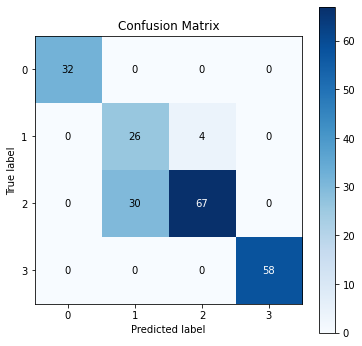

In [9]:
print("KNN MODEL")
#Knn model
with open(os.path.join(modelli_Imm_dir,'knn.pkl'), 'rb') as file:
    KNN = pkl.load(file)
result_knn = KNN.score(X_test, Y_test)
print(f"knn accuracy: {result_knn}")
y_pred = KNN.predict(X_test)
print(classification_report(Y_test, y_pred))
skplt.metrics.plot_confusion_matrix(Y_test,y_pred,figsize=(6,6))

LINEAR SVM MODEL
linear SVM accuracy: 0.9539170506912442
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.75      1.00      0.86        30
           2       1.00      0.90      0.95        97
           3       1.00      1.00      1.00        58

    accuracy                           0.95       217
   macro avg       0.94      0.97      0.95       217
weighted avg       0.97      0.95      0.96       217



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

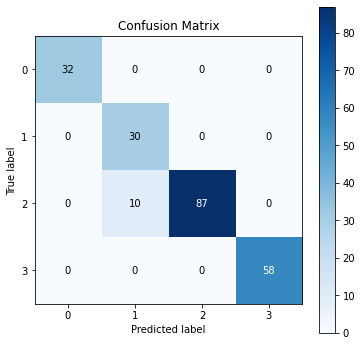

In [10]:
print("LINEAR SVM MODEL")
#linear_SVM model
with open(os.path.join(modelli_Imm_dir,'svm_linear.pkl'), 'rb') as file:
    SVM_l = pkl.load(file) 
result_SVM_l = SVM_l.score(X_test, Y_test)
print(f"linear SVM accuracy: {result_SVM_l}")
y_pred = SVM_l.predict(X_test)
print(classification_report(Y_test, y_pred))
skplt.metrics.plot_confusion_matrix(Y_test,y_pred,figsize=(6,6))


POLINOMIAL SVM MODEL
polinomial SVM accuracy: 0.9723502304147466
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.83      1.00      0.91        30
           2       1.00      0.94      0.97        97
           3       1.00      1.00      1.00        58

    accuracy                           0.97       217
   macro avg       0.96      0.98      0.97       217
weighted avg       0.98      0.97      0.97       217



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

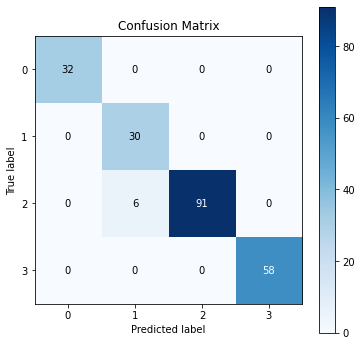

In [11]:
print("POLINOMIAL SVM MODEL")
#polinomial_SVM model
with open(os.path.join(modelli_Imm_dir,'svm_poly.pkl'), 'rb') as file:
    SVM_p = pkl.load(file)
result_SVM_p = SVM_p.score(X_test, Y_test)
print(f"polinomial SVM accuracy: {result_SVM_p}")
y_pred = SVM_p.predict(X_test)
print(classification_report(Y_test, y_pred))
skplt.metrics.plot_confusion_matrix(Y_test,y_pred,figsize=(6,6))

RBF SVM MODEL
rpf SVM accuracy: 0.8617511520737328
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.50      0.93      0.65        30
           2       0.97      0.71      0.82        97
           3       1.00      1.00      1.00        58

    accuracy                           0.86       217
   macro avg       0.87      0.91      0.87       217
weighted avg       0.92      0.86      0.87       217



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

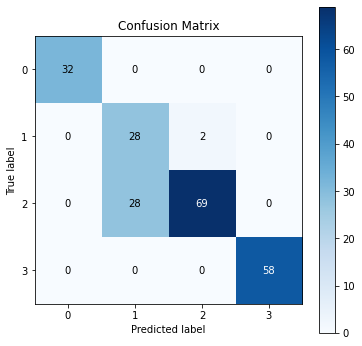

In [12]:
print("RBF SVM MODEL")
#rpf_SVM model
with open(os.path.join(modelli_Imm_dir,'svm_rbf.pkl'), 'rb') as file:
    SVM_rpf = pkl.load(file)
result_SVM_rpf = SVM_rpf.score(X_test, Y_test)
print(f"rpf SVM accuracy: {result_SVM_rpf}")
y_pred = SVM_rpf.predict(X_test)
print(classification_report(Y_test, y_pred))
skplt.metrics.plot_confusion_matrix(Y_test,y_pred,figsize=(6,6))

ADABOOST MODEL
AdaBoost accuracy: 0.9631336405529954
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.83      1.00      0.91        30
           2       1.00      0.94      0.97        97
           3       0.98      0.98      0.98        58

    accuracy                           0.96       217
   macro avg       0.95      0.97      0.96       217
weighted avg       0.97      0.96      0.96       217



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

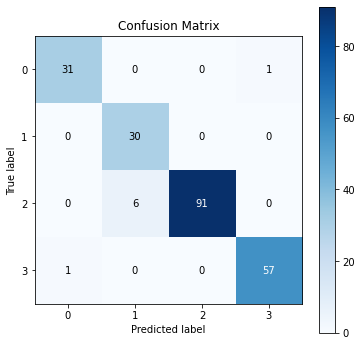

In [13]:
print("ADABOOST MODEL")
#AdaBoost model
with open(os.path.join(modelli_Imm_dir,'AdaBoost.pkl'), 'rb') as file:
    ADB = pkl.load(file)
result_ADB = ADB.score(X_test, Y_test)
print(f"AdaBoost accuracy: {result_ADB}")
y_pred = ADB.predict(X_test)
print(classification_report(Y_test, y_pred))
skplt.metrics.plot_confusion_matrix(Y_test,y_pred,figsize=(6,6))

In [14]:
print("CNN")
#CNN
CNN_model=tf.keras.models.load_model(os.path.join(modelli_Imm_dir,'CNN'))
test_loss = CNN_model.evaluate(X_test_CNN, Y_test_CNN)

CNN
7/7 [==============================] - 1s 59ms/step - loss: 0.3228 - accuracy: 0.8433


Accuratezza: 0.843317985534668


Precision on test set:  0.9036114584744223


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

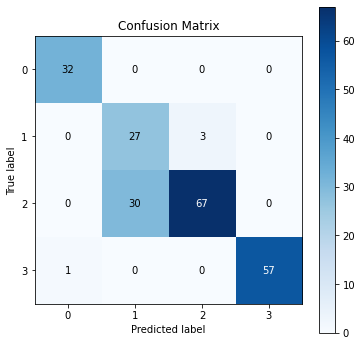

In [17]:
#Accuracy
print( "Accuratezza:" ,test_loss[1])

# Precision
y_pred_nn = CNN_model.predict_classes(X_test_CNN)
print('Precision on test set: ', metrics.precision_score(Y_test_CNN, y_pred_nn, average='weighted'))

skplt.metrics.plot_confusion_matrix(Y_test_CNN, y_pred_nn, figsize=(6,6))

Nella cella seguente la parte relativa alla anomaly detection:

In [5]:
normal=[] #immagini normali, ovvero tutte le immagini casual_shoes (classe più grande)
lab=[] # label nomali (1)
a_lab=[] #label anomali (-1)  
anomaly=[] #immagini anormali, ovvero tutte le rimanenti presenti nelle altre classi: wallets, sport_shoes, belts
c=0
for i in Images:
    if Labels[c]==1:
        normal.append(i)
        lab.append(1)
    else:
        anomaly.append(i)
        a_lab.append(-1)
    c+=1

#poichè abbiamo trasformato le immagini in grayscale dobbiamo aggiungere una dimensione
normal = np.expand_dims(np.array(normal), axis=3)
anomaly = np.expand_dims(np.array(anomaly), axis=3)
norm_labels = np.array(lab, dtype='int32')
anom_labels = np.array(a_lab, dtype='int32')

nsamples, nx, ny, nz = normal.shape
normal1 = normal.reshape((nsamples,nx*ny*nz))

asamples, ax, ay, az = anomaly.shape
anomaly1 = anomaly.reshape((asamples,ax*ay*az))

X_test_AD=normal1
Y_test_AD=norm_labels

test_set = np.append(X_test_AD, anomaly1, axis=0)
test_labels = np.append(Y_test_AD, anom_labels)

In [6]:
print("Anomaly Detection With ONE CLASS SVM")
#ONE CLASS SVM
with open(os.path.join(modelli_Imm_dir,'AnDetOCSVM.pkl'), 'rb') as file:
    ocsvm = pkl.load(file)
    
y_pred_ad = ocsvm.predict(X_test_AD)
a_pred = ocsvm.predict(anomaly1)

pred = np.append(y_pred_ad, a_pred)
t_labels = np.append(Y_test_AD, anom_labels)

print(classification_report(t_labels, pred))

Anomaly Detection With ONE CLASS SVM
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96       187
           1       1.00      0.43      0.60        30

    accuracy                           0.92       217
   macro avg       0.96      0.72      0.78       217
weighted avg       0.93      0.92      0.91       217



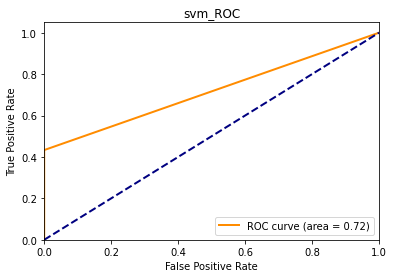

In [7]:
# Calcola la curva ROC e l'area ROC per le previsioni sul set di convalida
fpr, tpr, _ = roc_curve(t_labels, pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('svm_ROC')
plt.legend(loc="lower right")
plt.show()

In [8]:
print("Anomaly Detection With Isolation Forest")
#IsolationForest
with open(os.path.join(modelli_Imm_dir,'AnDetIsolationForest.pkl'), 'rb') as file:
    Iso_f = pkl.load(file)
    
y_pred_ad = Iso_f.predict(X_test_AD)
a_pred = Iso_f.predict(anomaly1)

pred = np.append(y_pred_ad, a_pred)
t_labels = np.append(Y_test_AD, anom_labels)

print(classification_report(t_labels, pred))

Anomaly Detection With Isolation Forest
              precision    recall  f1-score   support

          -1       0.95      0.31      0.47       187
           1       0.17      0.90      0.29        30

    accuracy                           0.39       217
   macro avg       0.56      0.61      0.38       217
weighted avg       0.84      0.39      0.44       217



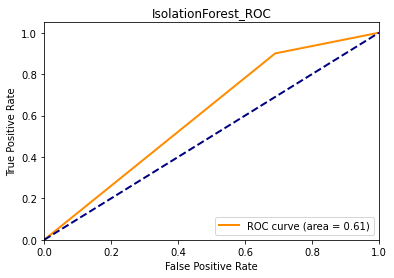

In [9]:
# Calcola la curva ROC e l'area ROC per le previsioni sul set di convalida
fpr, tpr, _ = roc_curve(t_labels, pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('IsolationForest_ROC')
plt.legend(loc="lower right")
plt.show()

In [10]:
print("Anomaly Detection With Local Outlier Factor")
#Local Outlier Factor
with open(os.path.join(modelli_Imm_dir,'AnDetOCSVM.pkl'), 'rb') as file:
    LocalOutFact = pkl.load(file)
    
y_pred_ad = LocalOutFact.predict(X_test_AD)
a_pred = LocalOutFact.predict(anomaly1)

pred = np.append(y_pred_ad, a_pred)
t_labels = np.append(Y_test_AD, anom_labels)

print(classification_report(t_labels, pred))

Anomaly Detection With Local Outlier Factor
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96       187
           1       1.00      0.43      0.60        30

    accuracy                           0.92       217
   macro avg       0.96      0.72      0.78       217
weighted avg       0.93      0.92      0.91       217



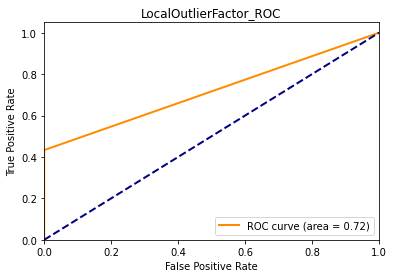

In [11]:
# Calcola la curva ROC e l'area ROC per le previsioni sul set di convalida
fpr, tpr, _ = roc_curve(t_labels, pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LocalOutlierFactor_ROC')
plt.legend(loc="lower right")
plt.show()

## Audio

Nella cella seguente carichiamo il dataset: 

In [ ]:
#da modificare
def get_images(directory):
    Images=[]
    Labels=[]
    #definiamo un dizionario che andrà a contenere i tipi di etichette che abbiamo
    label_dict={}
    i=0
    for filename in os.listdir(directory):
        #Usiamo la riga sottostante per prelevare le immagini a colori
        #imm = cv2.imread(os.path.join(directory,filename))
        #noi vogliamo trasformarle in scala di grigi, quinsi usiamo la riga seguente
        imm=cv2.cvtColor(cv2.imread(os.path.join(directory,filename)), cv2.COLOR_BGR2GRAY)
        imm = cv2.resize(imm,(60,80))
        Images.append(imm)
        label=filename.split("_")[0]
        if label not in label_dict:
            label_dict[label]=i
            Labels.append(i)
            i=i+1
        else:
            Labels.append(label_dict[label])
    return (Images,Labels, label_dict)

In [ ]:
# da modificare
Audio, Labels, label_dict =get_images(dataset_Audio_dir)

Andiamo a vedere quanti valori unici abbiamo per le etichette:

In [ ]:
label_dict

In [ ]:
#da modificare
Images = np.array(Images)
Labels = np.array(Labels)

#creazione test set per classificatori "standard"
dataset_size = len(Images)
X_test = Images.reshape(dataset_size,-1)
Y_test = Labels

#creazione test set per CNN
X_test_CNN = np.expand_dims(Images,axis=3)
Y_test_CNN = Labels

Nella cella seguente andiamo a caricare tutti i modelli:

In [ ]:
#Knn model
KNN = pickle.load(open(os.path.join(modelli_Audio_dir,'knn.pkl'), 'rb'))
result_knn = KNN.score(X_test, Y_test)
print(f"knn: {result_knn}")

#linear_SVG model
SVG_l = pickle.load(open(os.path.join(modelli_Audio_dir,'svm_linear.pkl') 'rb'))
result_SVG_l = SVG_l.score(X_test, Y_test)
print(f"linear SVG: {result_SVG_l}")

#polinomial_SVG model
SVG_p = pickle.load(open(os.path.join(modelli_Audio_dir,'svm_poly.pkl'), 'rb'))
result_SVG_p = SVG_p.score(X_test, Y_test)
print(f"polinomial SVG: {result_SVG_p}")

#rpf_SVG model
SVG_rpf = pickle.load(open(os.path.join(modelli_Audio_dir,'svm_rbf.pkl'), 'rb'))
result_SVG_rpf = SVG_rpf.score(X_test, Y_test)
print(f"rpf SVG: {result_SVG_rpf}")

#AdaBoost model
ADB = pickle.load(open(os.path.join(modelli_Audio_dir,'AdaBoost.pkl'), 'rb'))
result_ADB = ADB.score(X_test, Y_test)
print(f"AdaBoost: {result_ADB}")

#CNN
CNN_model=tf.keras.models.load_model(os.path.join(modelli_Audio_dir,'CNN'))
test_loss = CNN_model.evaluate(X_test_CNN, Y_test_CNN)

In [ ]:
#Accuracy
print( "Accuratezza:" ,test_loss[1])

# Precision
y_pred_nn = model.predict_classes(X_test_CNN)
print('Precision on test set: ', metrics.precision_score(Y_test_CNN, y_pred_nn, average='weighted'))

#Grafico di accuratezza e loss
plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('Accuracy & Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()


skplt.metrics.plot_confusion_matrix(Y_test_CNN, y_pred_nn, figsize=(6,6))

Nella cella seguente la parte relativa alla anomaly detection: